# Covid Tracking API 

In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import lxml.html as lx
import requests
import re
import json
import requests_cache

def request(State):    
    '''
    Function to make request to Yelp API with specific zip code.
    '''
    url = "https://covidtracking.com/api/v1/states/" + State + "/daily.json"
    req = requests.get(url)
    parsed = json.loads(req.text)
    return parsed 

State = 'CA'
covid = request(State)
print(covid)

[{'date': 20200429, 'state': 'CA', 'positive': 46500, 'negative': 556639, 'pending': None, 'hospitalizedCurrently': 5011, 'hospitalizedCumulative': None, 'inIcuCurrently': 1512, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': None, 'hash': 'f46fde83b3afd4e5e103064c1657eaffb73550e3', 'dateChecked': '2020-04-29T20:00:00Z', 'death': 1887, 'hospitalized': None, 'total': 603139, 'totalTestResults': 603139, 'posNeg': 603139, 'fips': '06', 'deathIncrease': 78, 'hospitalizedIncrease': 0, 'negativeIncrease': 24062, 'positiveIncrease': 1469, 'totalTestResultsIncrease': 25531}, {'date': 20200428, 'state': 'CA', 'positive': 45031, 'negative': 532577, 'pending': None, 'hospitalizedCurrently': 4983, 'hospitalizedCumulative': None, 'inIcuCurrently': 1485, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': None, 'hash': '84adeda0e1c36c6532c7897963d499d2b201743e', 'dateChecked': '2020-04-28T20:00:00Z'

# Covid Sentiment Analysis

## General Sentiment Analysis on Tweets

In [1]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import re
import json
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import pickle

### Data Preprocessing 

In [5]:
df = pd.read_csv('2020-03-28 Coronavirus Tweets.CSV')

def preprocess(df):
#Trimming the unnecessary columns
    df = df[['text', 'lang']]
    df.head()

    #Filtering out tweets not in English¶
    df = df[df['lang'] == 'en'].reset_index()['text']

    #Removing URLs from tweets
    df = df.apply(lambda x: re.sub(r"https\S+", "", x))

    #Converting all tweets to lowercase
    df = df.apply(lambda x: x.lower())

    #Removing punctuations¶
    df = df.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    #Removing stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp'])
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    #Concatenating all the tweets into a list of words
    word_list = [word for line in df for word in line.split()]
    word_list[:5]
    
    return df

df = preprocess(df)
df.head()

0    nearly 100000 coronavirus cases us tracker cov...
1    like wartime filipino doctors overwhelmed covi...
2    correspondence epidemiology covid19 covid19 sa...
3    advocates long argued safe supply would reduce...
4    amid covid19 pandemic bctruckingassoc says can...
Name: text, dtype: object

### Data Exploration 

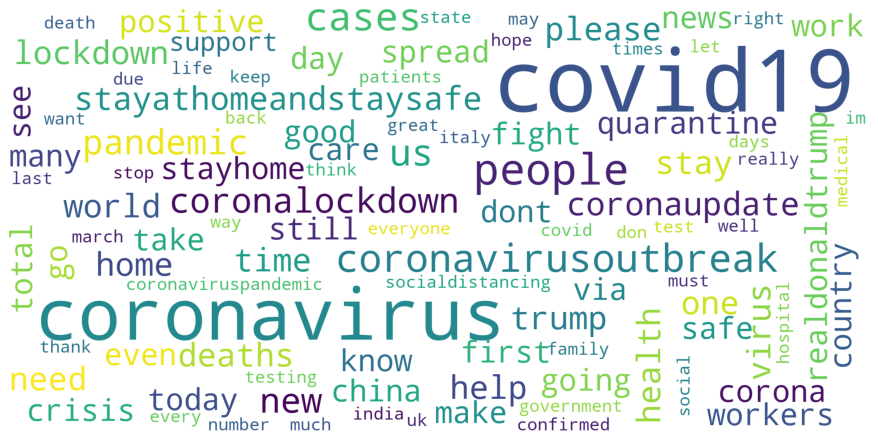

In [8]:
word_list = [word for line in df for word in line.split()]
word_list[:5]

#wordclouds
wordcloud = WordCloud(
    background_color='white',
    max_words=100,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

### Sentiment Analysis

In [19]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import classifiers

# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

df.groupby('sentiment').Text.count()

AttributeError: 'Series' object has no attribute 'encode'

## Dictionary based approach: Search on #StayHome

In [12]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from collections import Counter
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Debparna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Debparna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Preprocessing 

In [13]:
#Scrapped twitter for #StayHome tweets by each state and compiled them together. Data available in the data folder.
df = pd.read_csv("StayHome_final.csv")
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['Text'],inplace =True)
df = df[df['HashTags'].notna()]
df = df[df['date']>'2020-03-13']

def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

df['text_nlp'] = preprocess(df.Text)
df['text_nlp'] = df['text_nlp'].apply(remove_urls)
df['text_nlp'] = df['text_nlp'].apply(removes)

df['text_len'] = df.text_nlp.astype(str).apply(len)
df['word_count'] = df.text_nlp.apply(lambda x: len(str(x).split()))

stop_words = stopwords.words('english')
not_stopwords = {}
common_words =['com','twitter','please',
               'the','would','could','can','may','must', 
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.text_nlp = df.text_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.text_nlp = df.text_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.text_nlp = df.text_nlp.apply(lambda x: rm_space.sub(' ', x))

### Sentiment Analysis 

In [14]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import classifiers

# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

df.groupby('sentiment').Text.count()

sentiment
negative    1496
neutral     3975
positive    5677
Name: Text, dtype: int64

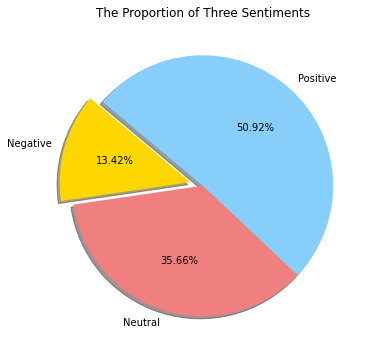

In [15]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

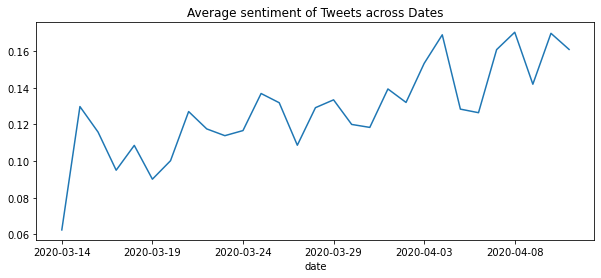

In [16]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['polarity'].plot(kind = 'line')
plt.title('Average sentiment of Tweets across Dates')

100%|██████████| 11148/11148 [00:00<00:00, 34036.17it/s]


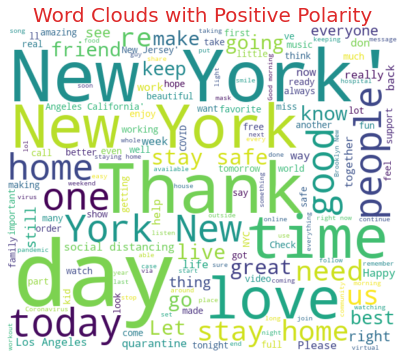

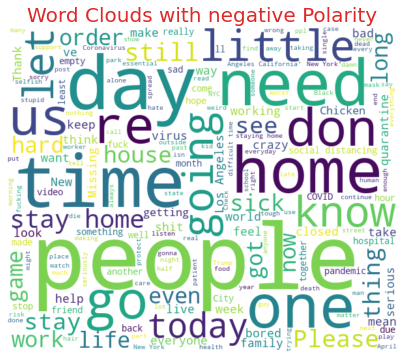

In [17]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['text_nlp']))): 
    for word in df['text_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=set(STOPWORDS))
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'positive'])))
    # declare our figure  
plt.figure(figsize=(7,6))
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#DE2929')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white', stopwords=set(STOPWORDS))
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'negative'])))
 
plt.figure(figsize=(7,6))
plt.title("Word Clouds with negative Polarity", fontsize=20,color='#DE2929')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Subjectivity 

Text(0.5, 1.0, 'Average Subjectivity of Tweets across Dates')

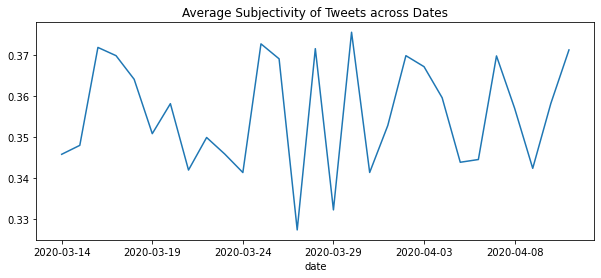

In [18]:
df['subjectivity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.subjectivity)
# classify sentiment into positive and negative ones
df['subject'] = ''
df['subject'][df['subjectivity'] > 0.5] = 'Subjective'
df['subject'][df['subjectivity'] < 0.5] = 'Objective'

df.groupby('subject').Text.count()

# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['subjectivity'].plot(kind = 'line')
plt.title('Average Subjectivity of Tweets across Dates')